In [1]:
from six.moves import cPickle as pickle

In [2]:
pickle_file = 'devanagari.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    train_dataset = save['train_dataset']
    train_labels = save['train_labels']
    valid_dataset = save['valid_dataset']
    valid_labels = save['valid_labels']
    test_dataset = save['test_dataset']
    test_labels = save['test_labels']
    del save 
    print('Training set', train_dataset.shape, train_labels.shape)
    print('Validation set', valid_dataset.shape, valid_labels.shape)
    print('Test set', test_dataset.shape, test_labels.shape)

Training set (69000, 32, 32) (69000,)
Validation set (9200, 32, 32) (9200,)
Test set (13800, 32, 32) (13800,)


In [3]:
import tensorflow as tf
train_labels = tf.keras.utils.to_categorical(train_labels)
valid_dataset = valid_dataset.reshape(valid_dataset.shape[0], 32,32,1)
valid_labels = tf.keras.utils.to_categorical(valid_labels)
train_dataset = train_dataset.reshape(train_dataset.shape[0], 32,32,1)
test_dataset = test_dataset.reshape(test_dataset.shape[0], 32,32,1)
test_labels = tf.keras.utils.to_categorical(test_labels)

/Users/aniketsharma/ml/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [4]:
import matplotlib.pyplot as plt

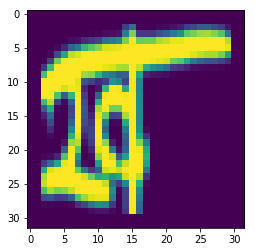

In [5]:
plt.imshow(train_dataset[3,:,:,0])

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [7]:
def baseline_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(32, 32,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3),input_shape=(14, 14,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(72, activation='relu'))
    model.add(Dense(46, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [8]:
cnn_model = baseline_cnn_model()

## Data augmentation

In [9]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(train_dataset)



In [10]:
cnn_model.fit_generator(datagen.flow(train_dataset, train_labels, batch_size=128),
                    steps_per_epoch=len(train_dataset) / 128, epochs=2)


Epoch 1/2
540/539 [==============================] - 56s 104ms/step - loss: 2.6624 - acc: 0.2744
Epoch 2/2
540/539 [==============================] - 56s 103ms/step - loss: 1.5893 - acc: 0.5389


In [11]:
cnn_model.fit(train_dataset, train_labels, validation_data=(valid_dataset, valid_labels), epochs=5, batch_size=128)
score,acc = cnn_model.evaluate(test_dataset,test_labels,batch_size=128)

Train on 69000 samples, validate on 9200 samples
Epoch 1/5
69000/69000 [==============================] - 55s 796us/step - loss: 0.3910 - acc: 0.8918 - val_loss: 0.2373 - val_acc: 0.9278
Epoch 2/5
69000/69000 [==============================] - 55s 798us/step - loss: 0.1816 - acc: 0.9461 - val_loss: 0.2039 - val_acc: 0.9363
Epoch 3/5
69000/69000 [==============================] - 54s 789us/step - loss: 0.1342 - acc: 0.9591 - val_loss: 0.1205 - val_acc: 0.9625
Epoch 4/5
69000/69000 [==============================] - 55s 800us/step - loss: 0.1047 - acc: 0.9676 - val_loss: 0.1052 - val_acc: 0.9686
Epoch 5/5
13800/13800 [==============================] - 4s 282us/step


In [12]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.1235961733304936
Test accuracy: 0.9636231884749039


In [13]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 72)                165960    
__________